In [1]:
.libPaths("C:/WFS_new/WFS/Personal R Libary")

library(bnlearn)
library(tidyverse)
library(graph)
library(gRbase)
library(gRain)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: BiocGenerics

Loading required package: parallel



Error in setMethod("path", cl, where = topenv(parent.frame()), function(object,  : 
  the environment 'base' is locked; cannot assign methods for function 'path'



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:bnlearn':

    path, score


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Error in setMethod("nodes", cl, where = topenv(parent.frame()), function(object) .nodes(object)) : 
  the environment 'base' is locked; cannot assign methods for function 'nodes'



Attaching package: 'graph'


The following object is masked from 'package:stringr':

    boundary


The following objects are masked from 'package:bnlearn':

    degree, nodes, nodes<-



Attaching package: 'gRbase'


The following objects are masked from 'package:bnlearn':

    ancestors, children, parents




In [2]:
Data_train_1<-read_csv("C:/WFS_new/WFS/Federated learning/final data train/New folder three train stations/BNdata_train_2008_2013.csv") 
Data_train_2<-read_csv("C:/WFS_new/WFS/Federated learning/final data train/New folder three train stations/BNdata_train_2014_2018.csv")
Data_train_3<-read_csv("C:/WFS_new/WFS/Federated learning/final data train/New folder three train stations/BNdata_train_EMA.csv")

Data_train_3<-mutate(Data_train_3,Notified="United States")



BNdata_train<-rbind(Data_train_1,Data_train_2)
BNdata_train<-rbind(BNdata_train,Data_train_3)


BNdata_train<-BNdata_train %>% mutate_if(is.numeric,as.character)

BNdata_train<-BNdata_train %>%  mutate_if(is.character,as.factor)



BNdata_test<-read_csv("C:/WFS_new/WFS/Federated learning/final data train/New folder three train stations/BNdata_test_2014_2018.csv")



Rows: 161 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (4): Product, Origin, Notified, Fraud
dbl (1): Year


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 115 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (4): Product, Origin, Notified, Fraud
dbl (1): Year


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 76 Columns: 4

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): Product, Origin, Fraud
dbl (1): Year


i Use `spec()` to retrieve the full column specificat

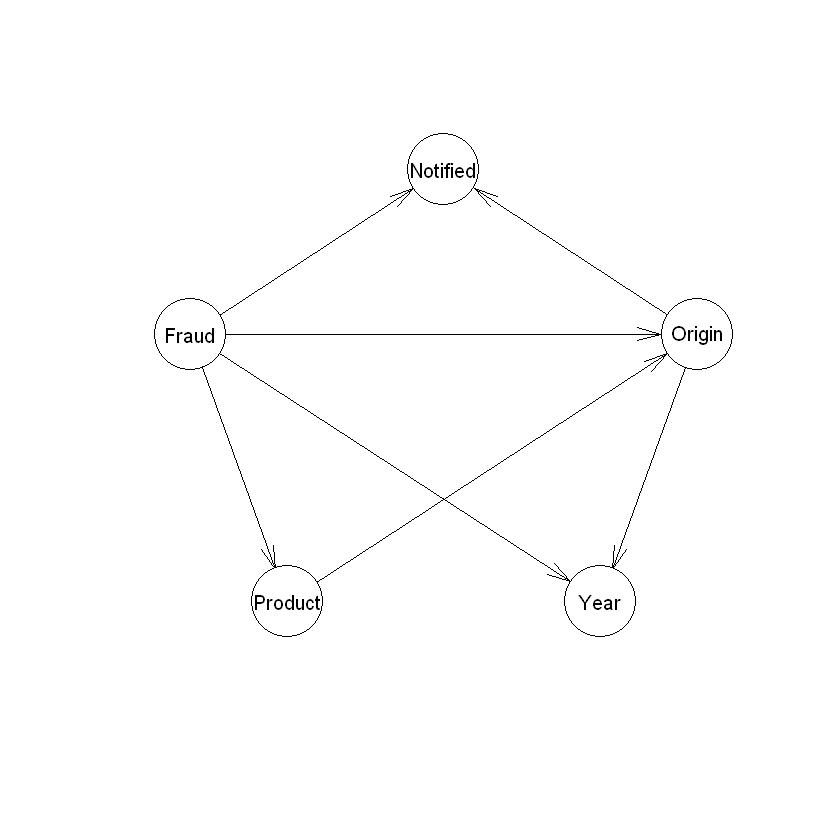

In [3]:
BNdata_train<-as.data.frame(BNdata_train)
BNdata_test<- as.data.frame(BNdata_test)

#structure leaning
BN_structure<- tree.bayes(BNdata_train,'Fraud')

## test other learning algorithms #

#BN_structure<-gs(BNdata_train)  ### Grow-Shrink (GS) Constraint-based algorithm
#BN_structure<-iamb(BNdata_train)### The incremental association Markov boundary algorithm
#BN_structure<-hc(BNdata_train)### Hill climbing algorithm

graphics::plot(BN_structure)
#graphviz.plot(BN_structure, shape = "ellipse")

In [4]:
BIC(BN_structure, BNdata_train)

[1] -33990.62

In [5]:
## parameter learning
BN_trained<-bn.fit(x=BN_structure,data=BNdata_train,method = "bayes")

## convert to gRain
fitted.grain = as.grain(BN_trained)

In [6]:
#Retrieve marginal probability distribution of each node
Mprobs = querygrain(fitted.grain, type = "marginal")
Mprobs 

$Fraud
Fraud
   Artificial enhancement/Improvement Smuggling-Mislabelling-Origin Masking 
                           0.05193579                            0.60151086 
                Substitution-Dilution 
                           0.34655335 

$Product
Product
                 Alcoholic                     Coffee 
               0.019964926                0.002967759 
             Confectionary                      Dairy 
               0.017132065                0.076622150 
                      Eggs               Fish_Seafood 
               0.022797788                0.150276541 
Food_additives_supplements                     Fruits 
               0.034129232                0.005800621 
            Grain_products               Herbs_spices 
               0.019964926                0.036962094 
                     Honey                       Meat 
               0.025630649                0.223930932 
               Mixed_foods                       Nuts 
               0.005800621                0.059624983 
                 Oils_Fats                    Poultry 
               0.053959261                0.028463510 
            Prepared_meals                     Snacks 
               0.090786456                0.005800621 
               Soups_sauce                        Tea 
               0.017132065                0.005800621 
                Vegetables 
               0.096452179 

$Origin
Origin
     Argentina      Australia        Austria     Bangladesh        Belarus 
   0.002879302    0.011377885    0.002879302    0.025542191    0.002879302 
       Belgium         Brazil       Bulgaria          China       Colombia 
   0.014210746    0.014210746    0.002879302    0.201179585    0.002879302 
       Croatia Czech Republic        Ecuador          Egypt        Estonia 
   0.005712163    0.002879302    0.002879302    0.005712163    0.002879302 
Faeroe Islands        Finland         France         Gambia        Germany 
   0.002879302    0.002879302    0.017043607    0.008545024    0.022709330 
         Ghana         Guinea        Hungary          India           Iran 
   0.048205081    0.002879302    0.008545024    0.082199415    0.014210746 
       Ireland         Israel          Italy          Japan         Jordan 
   0.011377885    0.002879302    0.036873636    0.002879302    0.002879302 
        Latvia        Lebanon  Liechtenstein      Lithuania         Mexico 
   0.002879302    0.005712163    0.002879302    0.002879302    0.002879302 
       Morocco        Myanmar    Netherlands        Nigeria       Pakistan 
   0.017043607    0.005712163    0.008545024    0.090697998    0.005712163 
          Peru    Philippines         Poland       Portugal        Romania 
   0.002879302    0.028375052    0.065202248    0.005712163    0.011377885 
  Saudi Arabia        Senegal   South Africa    South Korea          Spain 
   0.002879302    0.008545024    0.002879302    0.002879302    0.014210746 
        Sweden         Taiwan       Thailand         Turkey         Uganda 
   0.008545024    0.011377885    0.022709330    0.014210746    0.002879302 
       Ukraine United Kingdom  United States unknown origin        Uruguay 
   0.014210746    0.008545024    0.025542191    0.005712163    0.005712163 
       Vietnam 
   0.022709330 

$Year
Year
      2008       2009       2010       2011       2012       2013       2014 
0.07391192 0.04841617 0.08807623 0.10507340 0.03425187 0.22122071 0.07107906 
      2015       2016       2017       2018 
0.11640484 0.09090909 0.10224054 0.04841617 

$Notified
Notified
       Austria        Belgium       Bulgaria         Cyprus Czech Republic 
   0.005763407    0.014261991    0.005763407    0.008596268    0.008596268 
       Denmark        Estonia        Finland         France        Germany 
   0.017094852    0.005763407    0.002930546    0.019927713    0.048256325 
        Greece        Hungary        Iceland        Ireland          Italy 
   0.034092019    0.005763407    0.002930546    0.0

In [7]:
## internal validation: confusion matrix
pred_in <- predict(fitted.grain , response = c("Fraud"), newdata = BNdata_train, type = "class")

pred_in <- as.data.frame(pred_in)
table(BNdata_train$Fraud,pred_in$Fraud)
Detection_probability_inter<-sum(diag(table(BNdata_train$Fraud,pred_in$Fraud)))/
  sum(table(BNdata_train$Fraud,pred_in$Fraud))
Detection_probability_inter

                                       
                                        Artificial enhancement/Improvement
  Artificial enhancement/Improvement                                    16
  Smuggling-Mislabelling-Origin Masking                                  2
  Substitution-Dilution                                                  1
                                       
                                        Smuggling-Mislabelling-Origin Masking
  Artificial enhancement/Improvement                                        1
  Smuggling-Mislabelling-Origin Masking                                   203
  Substitution-Dilution                                                     1
                                       
                                        Substitution-Dilution
  Artificial enhancement/Improvement                        1
  Smuggling-Mislabelling-Origin Masking                     7
  Substitution-Dilution                                   120

[1] 0.9630682

In [8]:
## external validation: confusion matrix
pred_ex <- predict(fitted.grain, response = c("Fraud"), newdata=BNdata_test, type = "class")
pred_ex <- as.data.frame(pred_ex)


table(BNdata_test$Fraud,pred_ex$Fraud)
Detection_probability_exter<-sum(diag(table(BNdata_test$Fraud,pred_ex$Fraud)))/sum(table(BNdata_test$Fraud,pred_ex$Fraud))
Detection_probability_exter

                                       
                                        Artificial enhancement/Improvement
  Artificial enhancement/Improvement                                     0
  Smuggling-Mislabelling-Origin Masking                                  2
                                       
                                        Smuggling-Mislabelling-Origin Masking
  Artificial enhancement/Improvement                                        0
  Smuggling-Mislabelling-Origin Masking                                    25
                                       
                                        Substitution-Dilution
  Artificial enhancement/Improvement                        1
  Smuggling-Mislabelling-Origin Masking                     1

[1] 0.862069